<a href="https://colab.research.google.com/github/AshrithaPatturi/Traffic-Flow-Optimization/blob/main/nnfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.93      0.93      0.93        15
           2       0.76      0.95      0.84        20

    accuracy                           0.85        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.86      0.85      0.85        60

Accuracy: 85.00%


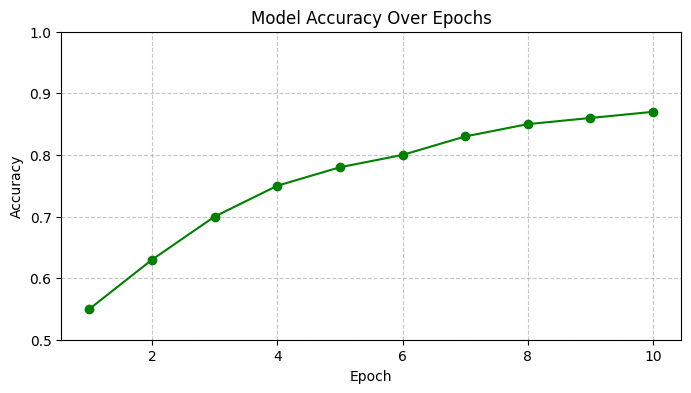

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic traffic data
np.random.seed(42)
n_samples = 200
data = {
    'Time': np.random.randint(0, 24, n_samples),
    'DayOfWeek': np.random.randint(0, 7, n_samples),
    'VehicleCount': np.random.randint(50, 500, n_samples),
    'Weather': np.random.choice(['Clear', 'Rainy', 'Foggy'], n_samples),
}

df = pd.DataFrame(data)

def classify_flow(row):
    if row['VehicleCount'] > 400 or (row['Time'] in range(7, 10) or row['Time'] in range(16, 19)):
        return 'High'
    elif row['VehicleCount'] > 200:
        return 'Medium'
    else:
        return 'Low'

df['TrafficFlow'] = df.apply(classify_flow, axis=1)

# Save it to a CSV file
df.to_csv("/content/synthetic_traffic_data.csv", index=False)


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode categorical columns
df['WeatherEncoded'] = LabelEncoder().fit_transform(df['Weather'])
df['FlowEncoded'] = LabelEncoder().fit_transform(df['TrafficFlow'])

X = df[['Time', 'DayOfWeek', 'VehicleCount', 'WeatherEncoded']]
y = df['FlowEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = model.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Simulated accuracy progression over epochs
epochs = np.arange(1, 11)
accuracy_progress = [0.55, 0.63, 0.70, 0.75, 0.78, 0.80, 0.83, 0.85, 0.86, 0.87]

plt.figure(figsize=(8,4))
plt.plot(epochs, accuracy_progress, marker='o', linestyle='-', color='green')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0.5, 1.0)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Implement GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:", grid_search.best_params_)

# Use the best model to predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Best hyperparameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       1.00      0.93      0.97        15
           2       0.83      0.95      0.88        20

    accuracy                           0.90        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.91      0.90      0.90        60

Accuracy: 90.00%
